In [1]:
import pandas as pd
import json
import os

## Obtendo a lista de repositorios

In [2]:
folder_path = '.'

items_list = os.listdir(folder_path)

directories = [item for item in items_list if os.path.isdir(os.path.join(folder_path, item))]
directories

['2023_09_10_21_28_ddqn_trader',
 '2023_09_11_00_43_ddqn_trader',
 '2023_09_11_00_02_ddqn_trader',
 '2023_09_10_22_46_ddqn_trader',
 '2023_09_11_01_03_ddqn_trader',
 '2023_09_11_00_44_ddqn_trader',
 '2023_09_10_22_06_ddqn_trader',
 '2023_09_10_23_23_ddqn_trader',
 '2023_09_11_00_41_ddqn_trader',
 '2023_09_10_23_24_ddqn_trader']

## Obtendo arquivos a lista de arquivos em um repositorio

In [7]:
directories_dict = []
directory_dict = {}

for directory in directories:
    files_inside_directory = os.listdir(directory)
    files = [file for file in files_inside_directory if file.endswith('.csv')]
    files.sort()

    directory_dict = {
        'path': directory,
        'files': files
    }
    directories_dict.append(directory_dict)
directories_dict

[{'path': '2023_09_10_21_28_ddqn_trader',
  'files': ['run-2023_09_10_21_28_ddqn_trader-tag-data___.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_agent_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_average_net_worth.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_avg_twap.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_ddql_loss_per_replay.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_diff_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_episode_orders.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_information_ratio.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_market_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_rewards.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_time_to_process.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_win_rate.csv']},
 {'path': '2023_09_11_00_43_ddqn_trader',
  'files': ['run-2023_09_11_00_43_ddqn_trader-tag-data___.csv',
   'run-2023_09_11_00_43_ddqn_trader-tag-data_agent_return

## Obtendo os dataframes e métricas

In [51]:
translate_dict = {
    'Step': 'Passo',
    'agent_returns': 'Retorno do agente',
    'average_net_worth': 'Patrimônio líquido médio',
    'avg_twap': 'TWAP médio',
    'diff_returns': 'Diferença de retorno', 
    'episode_orders': 'Pedidos por episódio',
    'information_ratio': 'Razão de informação',
    'market_returns': 'Retorno do mercado', 
    'rewards': 'Recompensas', 
    'time_to_process': 'Tempo de processamento',
    'win_rate': 'Taxa de sucesso'
}
translate_fn = lambda x: translate_dict.get(x) if  translate_dict.get(x, None) else x

for index, _ in enumerate(directories_dict):
    path = directories_dict[index].get('path')
    files = directories_dict[index].get('files')
    columns = [file.split('tag-data_')[1].split('.csv')[0] for file in files if 'tag-data_' in file]
    with open( f"{path}/parameters.json", 'r') as json_file:
        json_data = json.load(json_file)
    
    for _, file in enumerate(files):
        current_path = f"{path}/{file}"
        dict_to_rename_column = {
            'Wall time': 'Wall time',
            'Step': 'Step',
            'Value': columns[_]
        }
        # print(dict_to_rename_column)
        if _ == 0:
            df = pd.read_csv(current_path)
            df = df.rename(columns=dict_to_rename_column)
            df = df.drop("Wall time", axis=1)
        else:
            df_aux = pd.read_csv(current_path)
            df_aux = df_aux.rename(columns=dict_to_rename_column)
            df_aux = df_aux.drop("Wall time", axis=1)

            # , names=['Wall time', 'Step', columns[_]])
            df = pd.merge(df, df_aux, on=['Step'], how='left')

    directories_dict[index]['stock_name'] = json_data.get("stock_name")
    directories_dict[index]['processing_device'] = json_data.get("processing_device")
    directories_dict[index]['network_architecture'] = json_data.get("network_architecture")
    directories_dict[index]['period_type'] = json_data.get("period_type")
    directories_dict[index]['dataframe'] = df

directories_dict

[{'path': '2023_09_10_21_28_ddqn_trader',
  'files': ['run-2023_09_10_21_28_ddqn_trader-tag-data___.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_agent_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_average_net_worth.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_avg_twap.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_ddql_loss_per_replay.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_diff_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_episode_orders.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_information_ratio.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_market_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_rewards.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_time_to_process.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_win_rate.csv'],
  'dataframe':     Step          __  agent_returns  average_net_worth  avg_twap  \
  0      0   11.108744       1.000075        1017.754761  0.048887   
  1      1  

## Gerando graficos

In [22]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [36]:
directories_dict[0].get('dataframe').columns

Index(['Step', '__', 'agent_returns', 'average_net_worth', 'avg_twap',
       'ddql_loss_per_replay', 'diff_returns', 'episode_orders',
       'information_ratio', 'market_returns', 'rewards', 'time_to_process',
       'win_rate'],
      dtype='object')

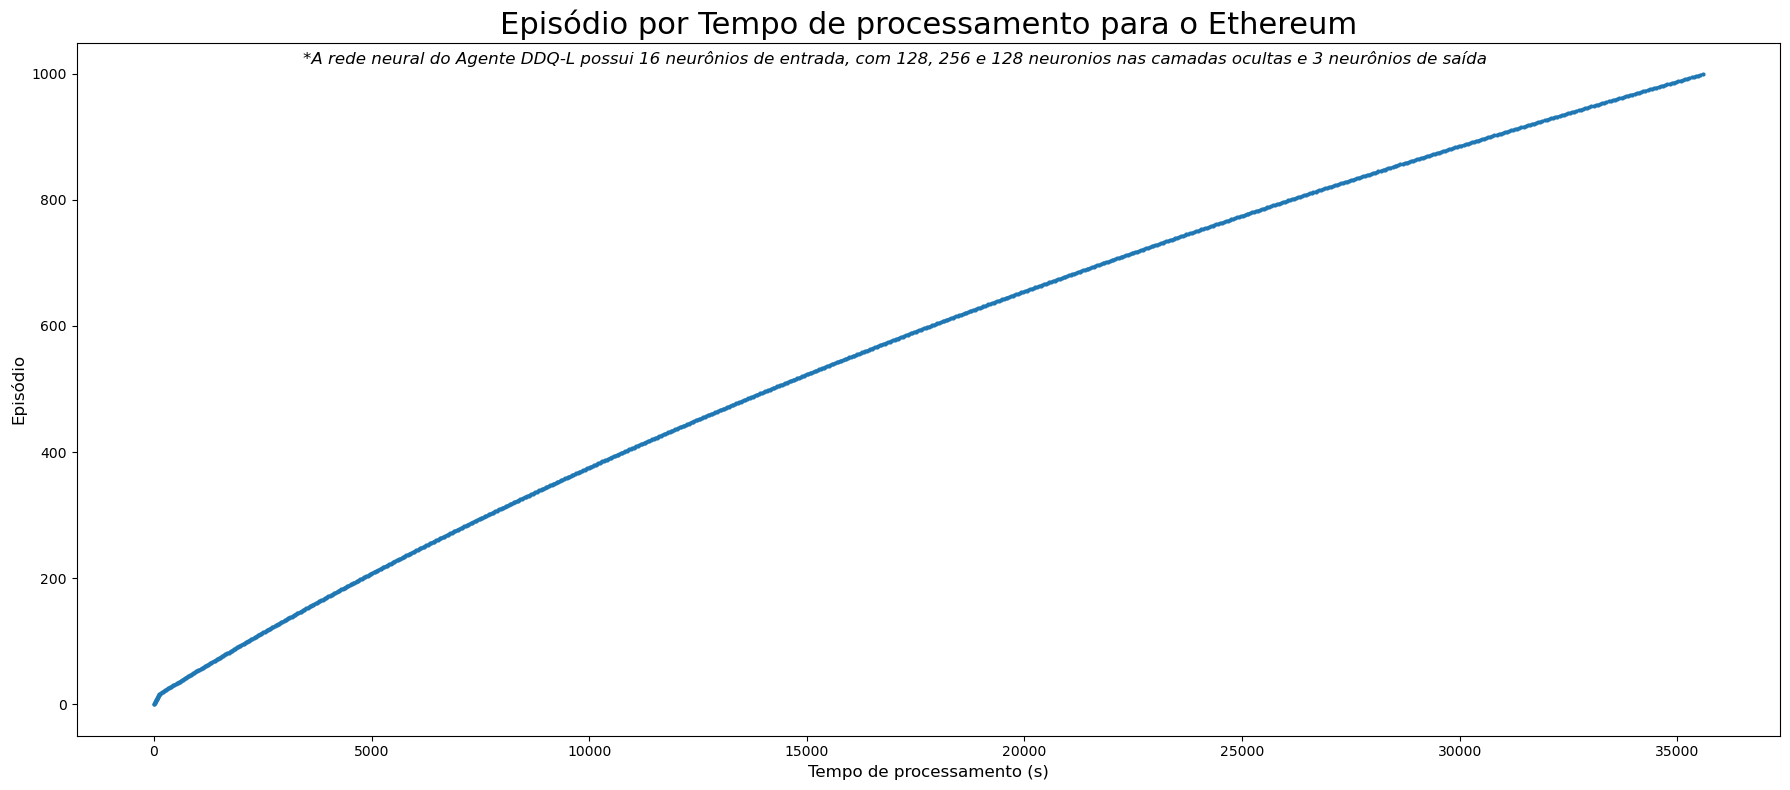

In [118]:
def plot_data(directories_dict, axis, axis_label='', title=''):
    def get_network_architecture(input_text):
        input = re.search(r'input: (\d+)', input_text).group(1)

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')
        hidden_layers = ", ".join(map(str, hidden_layers[:-1])) + " e " + str(hidden_layers[-1])

        output = re.search(r'output: \[(.*?)\]', input_text).group(1)
        output = len([int(numero) for numero in output.split()])

        output_text = f'*A rede neural do Agente DDQ-L possui {input} neurônios de entrada, com {hidden_layers} neuronios nas camadas ocultas e {output} neurônios de saída'

        return output_text
    
    def translate_fn(key, type='title'):
        translate_dict = {
            'Step': 'Episódio',
            'agent_returns': 'Retorno do agente',
            'average_net_worth': {'title': 'Patrimônio líquido médio', 'label': 'Patrimônio líquido médio (USD)'},
            'avg_twap': 'TWAP médio',
            'diff_returns': 'Diferença de retorno', 
            'episode_orders': 'Pedidos por episódio',
            'information_ratio': 'Razão de informação',
            'market_returns': 'Retorno do mercado', 
            'rewards': 'Recompensas', 
            'time_to_process': {'title': 'Tempo de processamento', 'label': 'Tempo de processamento (s)'},
            'win_rate': 'Taxa de sucesso'
        }

        if isinstance(translate_dict.get(key), dict):
            if type == 'title':
                return translate_dict.get(key).get('title')
            elif type == 'label':
                return translate_dict.get(key).get('label')
            else:
                raise Exception('Type not found')
        elif translate_dict.get(x, None):
            return translate_dict.get(key)
        else:
            return x

    x, y = axis
    x_label, y_label = axis_label if isinstance(axis_label, tuple) else axis
    fig = plt.figure(figsize=(18,8))

    df = directories_dict.get('dataframe')
    plt.plot(df[x], df[y], marker='o',linestyle='-', markersize=2)
    title = f"{translate_fn(y_label, 'title')} por {translate_fn(x_label, 'title')} para o {'Bitcoin' if directories_dict.get('stock_name') == 'BTCUSD_1h' else 'Ethereum'}"
    ax = plt.title(title, fontsize=22)

    ax = plt.suptitle(get_network_architecture(directories_dict.get("network_architecture")), fontsize=12, style='italic' , y=0.93)

    ax=plt.xlabel(translate_fn(x_label, 'label') , fontsize=12)
    ax=plt.ylabel(translate_fn(y_label, 'label') , fontsize=12)
    ax=plt.gca()
    fig.tight_layout()
    plt.show()

plot_data(directories_dict[1], axis=('time_to_process', 'Step'), title='Close')